#**image enhancement** -
Image enhancement is the process of adjusting digital images so that the results are more suitable for display or further image analysis. For example, you can remove noise, sharpen, or brighten an image, making it easier to identify key features.

In this notebook we will be studying three key image enhancement techniques - histogram equilisation, contrast stretching and gamma correction.


## **image histograms**
An image histogram is a graphical representation of the distribution of intensity values in an image. It plots the frequency of occurrence of each intensity level (usually ranging from 0 to 255 in grayscale images) along the x-axis against the number of pixels having that intensity level along the y-axis.




Contrast is a property of digital images that represents the difference between the highest and lowest pixel intensities.
Images with higher contrast values have darker blacks and brighter whites. Such images often posses a more spred image histograms.

operations you could perform on image histograms are

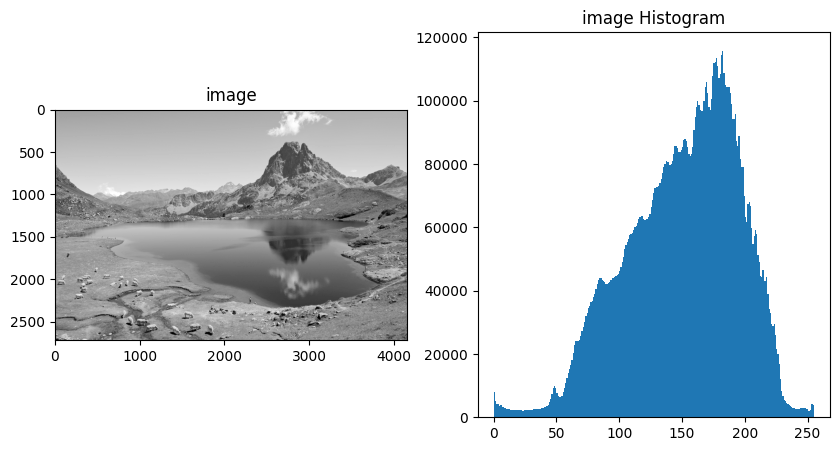

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("img1.jpg", cv.IMREAD_GRAYSCALE)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap = "gray"), plt.title("image")
# plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")
plt.subplot(1, 2, 2)
_ = plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")




This image we notice that all the intesities are prominently found in the 100 - 200 intensity

## **Histogram equilisation**

Histogram equalization is a method to process images in order to adjust the contrast of an image by modifying the intensity distribution of the histogram. The objective of this technique is to give a linear trend to the cumulative probability function associated to the image.

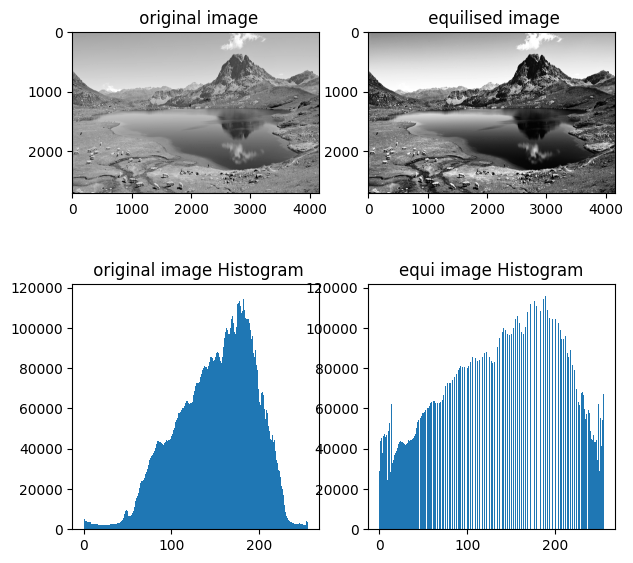

In [ ]:
import cv2
equ = cv2.equalizeHist(img)
# plt.imshow(equ, cmap = "gray")
plt.figure(figsize = (7, 7))
plt.subplot(2, 2, 1), plt.imshow(img, cmap = "gray"), plt.title(" original image")
plt.subplot(2, 2, 2), plt.imshow(equ, cmap = "gray"), plt.title(" equilised image")
# plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")
plt.subplot(2, 2, 3)
_ = plt.hist(np.array(img).flatten(), bins = 255), plt.title(" original image Histogram")
plt.subplot(2, 2, 4)
_ = plt.hist(np.array(equ).flatten(), bins = 255), plt.title("equi image Histogram")

after performing histogram equalisation we note that the final image histogram is more evenly distributed and image also appears more appealing to eyes with deeper blacks.  

In [ ]:
OldRange = (255 - 50)
NewRange = (155 - 50)
NewValue = (((img -50) * NewRange) / OldRange) + 50

## **Results from internet**

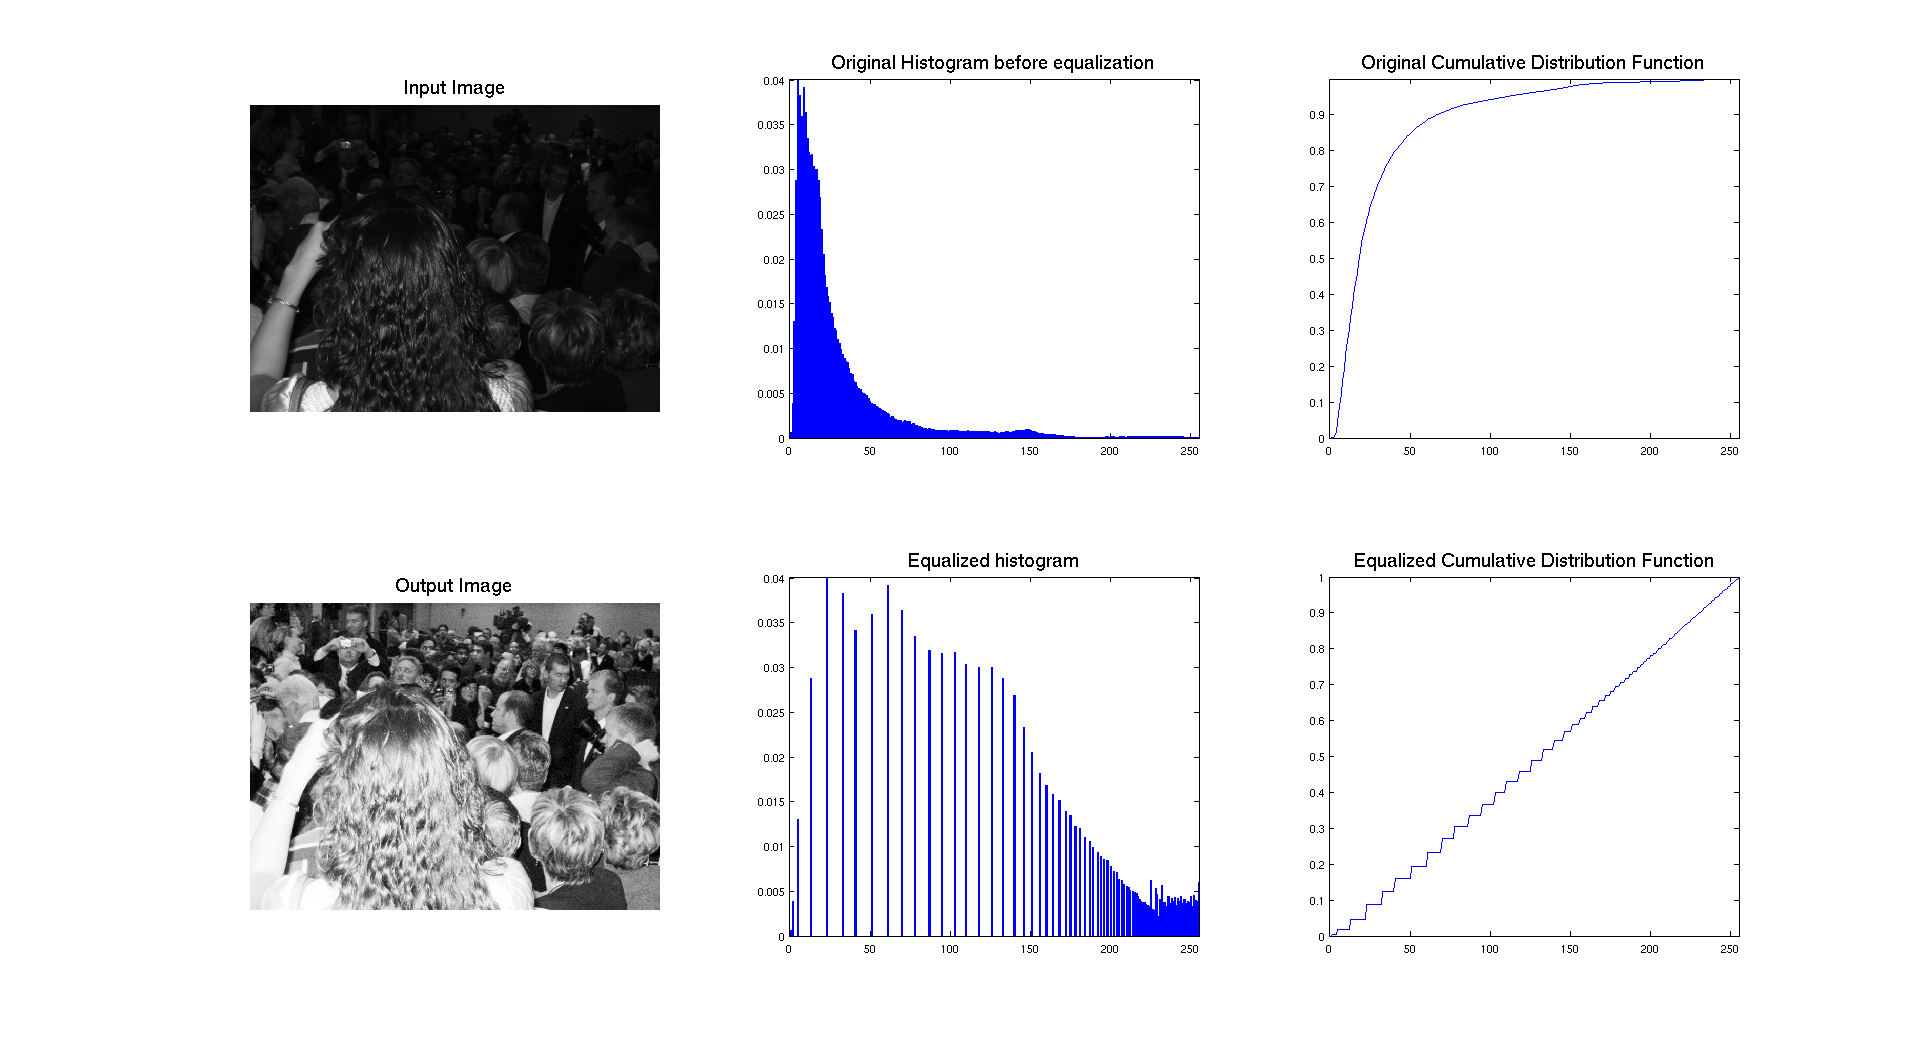

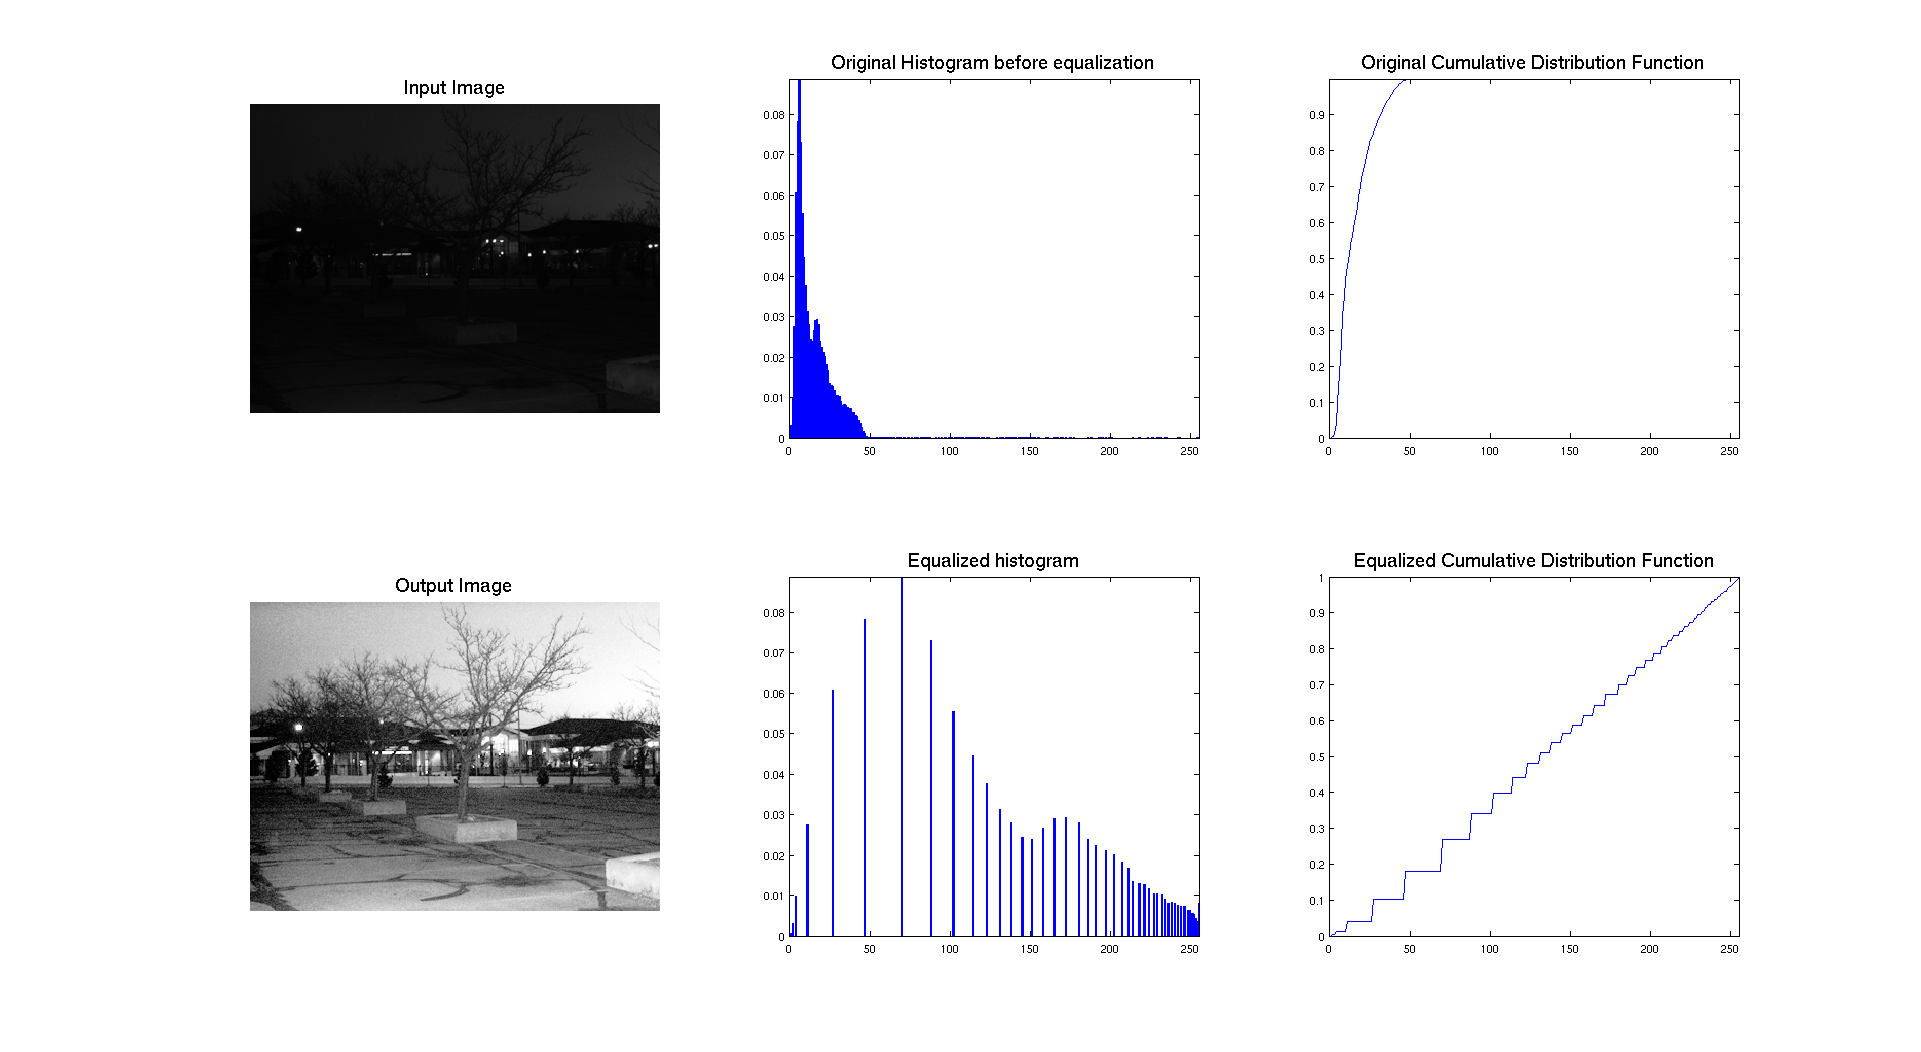

## **Contrast stretching**

Sometimes images histogram might be squished and may not occupy the full range of possible intensities in (0-255).
such images might appear bleached. Contrast stretching readjusts the range of image pixel intesities without changing the relaive differences between pixel intensity values.







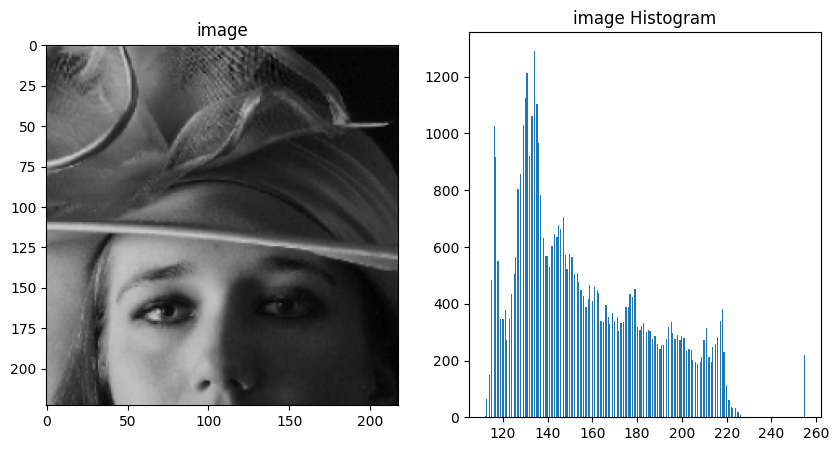

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("/content/ctr_stretch.jpg.png", cv.IMREAD_GRAYSCALE)
# img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap = "gray"), plt.title("image")
# plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")
plt.subplot(1, 2, 2)
_ = plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image):
    # Convert image to grayscale
    gray_image = image

    # Get minimum and maximum pixel values
    min_val = np.min(gray_image)
    max_val = np.max(gray_image)

    # Perform contrast stretching
    stretched_image = ((gray_image - min_val) / (max_val - min_val)) * 255

    # Convert back to uint8
    stretched_image = stretched_image.astype(np.uint8)

    return stretched_image

# Read the image
image = cv2.imread('ctr_stretch.jpg.png', cv2.IMREAD_GRAYSCALE)

# Apply contrast stretching
stretched_image = contrast_stretching(image)

# Display the original and stretched images side by side using Matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Stretched Image')
plt.imshow(stretched_image, cmap='gray')
plt.axis('off')

plt.show()


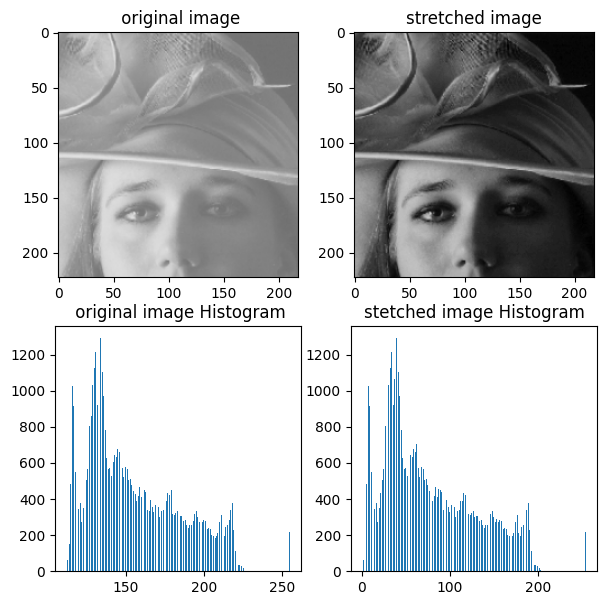

In [ ]:
import cv2
image = cv2.imread("ctr_stretch.jpg.png" ,cv2.IMREAD_GRAYSCALE)
# plt.imshow(equ, cmap = "gray")
plt.figure(figsize = (7, 7))
plt.subplot(2, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap = "gray"), plt.title(" original image")
plt.subplot(2, 2, 2), plt.imshow(stretched_image, cmap = "gray"), plt.title("stretched image")
# plt.hist(np.array(img).flatten(), bins = 255), plt.title("image Histogram")
plt.subplot(2, 2, 3)
_ = plt.hist(np.array(image).flatten(), bins = 255), plt.title(" original image Histogram")
plt.subplot(2, 2, 4)
_ = plt.hist(np.array(stretched_image).flatten(), bins = 255), plt.title("stetched image Histogram")

here you can notice that the originals range starts at 122.

##**Gamma correction**

Gamma correction is a technique used to adjust for the non-linear display characteristics of a device, such as how a camera captures content, how a display displays content, and how our visual system processes light. It's performed by the camera and monitor, which have an internal function that adjusts brightness to create more realistic images.


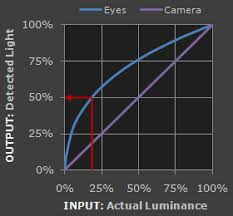

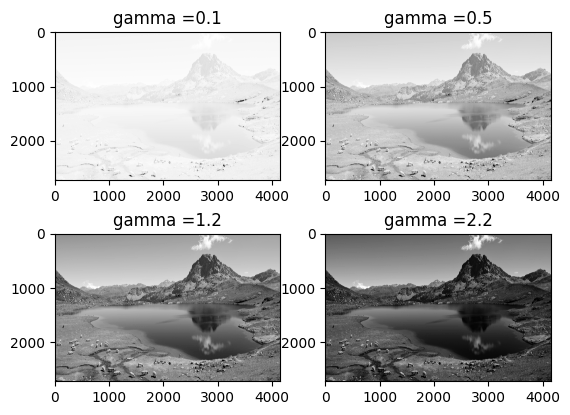

In [ ]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread('/content/drive/MyDrive/img1.jpg', cv2.IMREAD_GRAYSCALE)
gammas = [0.1, 0.5, 1.2, 2.2]
# Trying 4 gamma values.
for i in range(4):
  gamma = gammas[i]
  # Apply gamma correction.
  gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')
  plt.subplot(2, 2, i+1), plt.imshow(gamma_corrected, cmap = "gray"), plt.title("gamma =" + str(gamma))